# Introduction to Neural Networks and Deep Learning

## What's the difference between Artificial Intelligence, Machine Learning and Deep Learning?

**Artificial Intelligence** (AI) is a very old field of research. It started in the 1950s; at that time, the pioneers in AI were convinced that they could make machines think. The initial approach was attempting to model intellectual tasks, and program those tasks in computers. That is, in the beginning, AI was about people *hard-coding* problems that the machine tried to solve. A good example of an early AI program is computer chess. Early AI computer chess programs had **lots of rules pre-conceived by the program designers**. So although the term refers to "intelligence", these programs were not "intelligent", but just a sophisticated set of rules.

* The term *neural network* was also born at that time. The initial idea was trying to mimic how a *neuron* works (or in fact, how it was thought a neuron worked when the term was coined) in the brain. As in the case of *Artificial Intelligence*, please do not be fooled by the terms. A *neural network* is just a way to compute approximation to functions. A powerful and useful way, true. But it is not any kind of "artificial brain", or anything like that.

This approach is now obsolete. We now know that some tasks are so complex, that we will never be able to pre-design a system to have a good performance on those tasks. Take the example of the game of Go. Any program designed by humans to play Go was dull and could not compete against professional players. The game is so hard that is just impossible for us as humans to conceived a good Go computer player.
* https://en.wikipedia.org/wiki/Go_(game)

The modern approach to solve this kind of problems involves the use of data. This is what the *learning* part of *Deep Learning* (and *Machine Learning*) refers to. **Learning from data**. So, with this brief introduction, we can say that *Artificial Intelligence* is a broad concept that includes *Machine Learning*, that includes *Deep Learning*. *Artificial Intelligence* does not necessarily means learning from data, but Machine Learning does. And *Deep Learning* is just doing *Machine Learning* with neural networks.

![](imgs/01_ai_ml_dl.png)

We will see during this course what *learning* means, and what is a *neural network*. 

In the case of the game of Go, all attempts to design a good Go computer player failed, until Google DeepMind created AlphaGo, a system that *learned* to play Go based on data from previous games. AlphaGo is an example that learning from data can provide computer systems that are superior to any system pre-conceived by humans.
* Find out more about AlphaGo by watching this utterly interesting movie: https://www.alphagomovie.com/

In this course, we will give our first steps on *Deep Learning* and *Neural Networks*, to start creating systems that perform complex tasks by learning from data. Instead of attempting to derive the rules by ourselves, those rules will be inferred by a neural network based on the data we provide:

![](imgs/02_rules_data.png)

# Deep Learning and Machine Learning: why is everyone now talking about Deep Learning?

To create our system, we need data:
* Input data points; e.g. images to recognize shapes inside the images.
* Examples of expected output. The system will use these examples to learn from them. For the images above, we will need *labels* telling us what is in the image.

The neural network will *learn* from this data. But in fact, what the network is doing is learning a *representation* of the data that makes the task much easier to solve.

Let's see an example. We have the following input data (x,y coordinates for the points), and the labels of each item (the color of the point). We would like to obtain a model to separete the two classes of points:

![](imgs/03_points.png)

How would you separate the points? In the current reference system, it can be a complex task. But if you change the reference system (*if you learn a new representation of the data*), the task becomes trivial:

![](imgs/04_representation.png)

In Deep Learning, we learn **layers** of increasingly better representations. The **deep** in Deep Learning refers to the number of layers that we learn. Before Deep Learning, the models that we are going to see today were much shallower. The most typical form of the layer representations is **neural networks**. As we will see, **neural networks** are just chain of matrix operations -- arrays of 2 dimensions--, or more precisely, tensor operations, we will operate in dimensions higher than 2.


* More about learning representations: https://www.bbvadata.com/not-deep-learning-learning-represent/

In [0]:
import numpy as np

In [12]:
x=np.array([1,2])
W=np.array([[-1,-2],[-1,5]])

b=np.array([3,-3])
layer=W.dot(x)+b

layer_with_activation=np.maximum(layer,0)
layer_with_activation,layer

(array([0, 6]), array([-2,  6]))

## Neural Networks

A neural network is just a stacked set of layers. Each layer is represented by a tensor, and it performs an affine transformation on each one of the layers.
* A matrix is a 2D tensor
* Affine transformation $\vec{y} = W\cdot\vec{x} + \vec{b}$, where $W$ is the weights tensor, $\vec{x}$ is the input data, $\vec{y}$ is the output data and $\vec{b}$ is called the bias
* $W$ and $\vec{b}$ are model parameters that need to be found by training

![](imgs/05_nn.png)

Note that this is a **linear operation**, therefore the result will be linear too. But the functions we want to learn are normally non-linear. How do we overcome this limiation? By using an **activation function**, that transforms the result from the linear operation. So, we actually do the following operation:

$\vec{y} = f\left(W\cdot\vec{x} + \vec{b}\right)$

There are several common activation functions, depending on the characteristics of the data and the kind of problem we want to solve. Here we will use the probably most often used activation function: **rectified linear unit**, or **relu** for friends:

![Relu plot](https://upload.wikimedia.org/wikipedia/commons/6/6c/Rectifier_and_softplus_functions.svg)

(image extracted from https://en.wikipedia.org/wiki/Rectifier_(neural_networks))

Relu will add the non-linearity that we need to learn arbitrary functions.

We can achieve the same with many other activation functions. See the documentation of Keras for details on the available activation functions:
 - https://keras.io/activations/


Each layer learns a new representation of the input data, and after several layers, the representation will make it straightforward to solve the task (e.g. assiging a digit to an image of a digit).

Until very recently, any attempt to train a deep neural network would not provide good results. Recent progresses (e.g. advances in hardware, new activation functions) make it possible to train very deep network, and therefore, solve problems that were unfeasible not long ago.

### Training process

The parameters of the network are initially randomly assigned. Then after each pass of the network, that is, after each *epoch*, the predictions of the network is compared against the true values, applying a *loss function*. This score is used to update the parameters of the network, with a process called **backpropagation**.
* Backpropagation is a complex process that involves calculating the gradient of the parameters of the network. For more details see: https://en.wikipedia.org/wiki/Backpropagation
* See also this excellent and visual explanation of how backpropagation works: https://google-developers.appspot.com/machine-learning/crash-course/backprop-scroll/

The training process is just an optimization process, that is normally done using a gradient descent-based algorithm. The values of gradients are computed using the backpropagation algorithm. Each epoch will make the loss score to be lower, and the predictions to be better.

![](imgs/06_optim.png)

In practice, we have to fine tune the number of epochs (and other parameters), until we obtain a result that is good enough for our purpose. In fact, if the number of epochs is too high, our model may **overfit** the training data. In that case, it will perform worsely when the model is exposed to data that it  has not seen previously.
* Fine tuning the number of epochs, and other parameters (e.g. the number and shape of the layers) is known as **hyperparameters optimization**, or **hyperparameters tuning**
* The parameters of the model are the $W$ and $b$ values of each layer, and those are determined by training.

## Hyperparameters tuning

In summary, when we are trying to obtain a deep learning model, the process that we will follow is:
* Decide on the architecture of the network (number of layers, type of each layer, size of each layer)
* Decide on the activation functions on each layer
* Decide on the parameters related to the optimization process (e.g. learning rate)
* Decide on the loss function that we will use
* Decide on the metrics that we will use to evaluate the performance of the model
* Decide on the training parameters (number of epochs, batch size)
* Decide on how to split the data between training, validation and test sets.

We obtain feedback for those decisions with the results of the training applied to the validation set. We train once, change some of the hyperparameters, train again, decide if that's better, and we keep going until we have found a model that is satisfactory enough for our purposes.

After that, we finally evaluate the model on the test set.

## Our first neural network

Let's start with an easy example. We are going to produce some synthetic data, and will try to predict the function that generates the data. We will add some noise, to make the problem more difficult.

The function we are going to try to predict is

$\displaystyle y = 3*x + 2$

In [13]:
%pylab inline
plt.style.use('seaborn-talk')

Populating the interactive namespace from numpy and matplotlib


In [0]:
def plot_metric(history, metric):
    history_dict = history.history
    values = history_dict[metric]
    if 'val_' + metric in history_dict.keys():  
        val_values = history_dict['val_' + metric]

    epochs = range(1, len(values) + 1)

    if 'val_' + metric in history_dict.keys():  
        plt.plot(epochs, val_values, label='Validation')
    plt.semilogy(epochs, values, label='Training')

    if 'val_' + metric in history_dict.keys():  
        plt.title('Training and validation %s' % metric)
    else:
        plt.title('Training %s' % metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()

    plt.show()  

### Preparar los datos

In [0]:
x_train = np.linspace(0, 100, 1000)
y_train = 3*x_train + 2

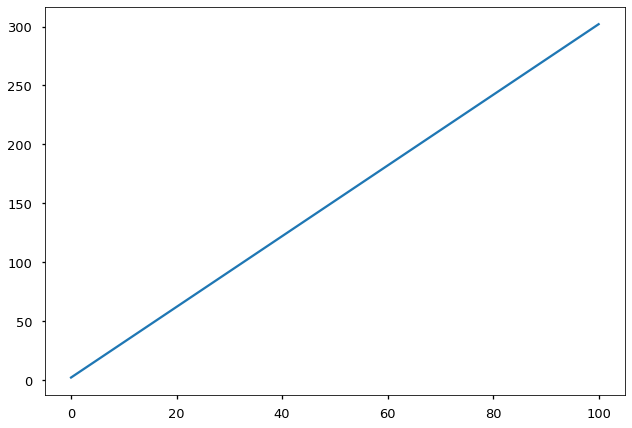

In [15]:
plot(x_train, y_train)

In [0]:
x_test = np.linspace(100.1, 110, 1000)
y_test = 3*x_test + 2

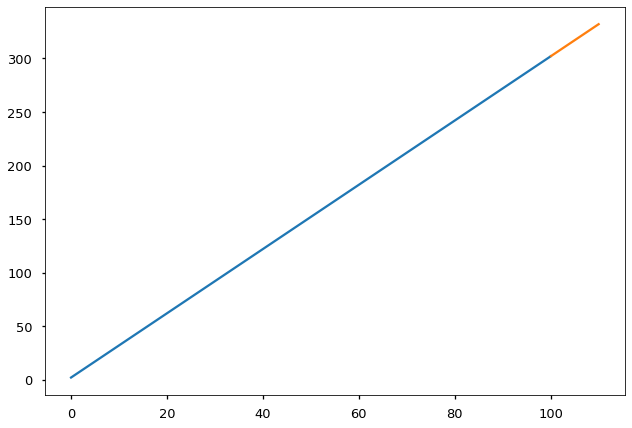

In [17]:
plt.plot(x_train,y_train)
plt.plot(x_test,y_test)
plt.show()

In [0]:
import tensorflow as tf

In [21]:
%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
import tensorflow.keras as keras
from keras import layers

In [27]:
layers.Dense(units=64,activation='relu')

In [0]:
from keras import Sequential

In [0]:
model=Sequential()

Un conjunto de datos x y un conjunto de etiquetas y.

Montar 3 capas de 128, 64 y 32 neuronas

In [37]:
capa1=layers.Dense(units=128,activation='relu',input_shape=(1,))
model.add(capa1)
capa2=layers.Dense(units=64,activation='relu',input_shape=(1,))
model.add(capa2)
model.add(layers.Dense(units=32,activation='relu',input_shape=(1,)))
model.add(layers.Dense(units=1,activation='relu',input_shape=(1,)))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               256       
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 10,625
Trainable params: 10,625
Non-trainable params: 0
_________________________________________________________________


Numero de params es igual a los pesos mas los biases

Ejemplo, capa 1:

y= tamaño 128, W=tamaño 128x1, x = tamaño 1, b= tamaño 128

capa 2:

y= tamaño 64, W=tamaño 64x128, x = tamaño 128, b= tamaño 64

capa 3:

y= tamaño 32, W=tamaño 32x64, x = tamaño 64, b= tamaño 32

capa 4:

y= tamaño 1, W=tamaño 1x32, x = tamaño 32, b= tamaño 32



In [0]:
from keras import optimizers
from keras import losses
from keras import metrics

In [39]:
model.compile(optimizer=optimizers.RMSprop(), loss=losses.mse)

In [42]:
h = model.fit(x_train,y_train,batch_size=100,epochs=20,validation_split=0.1)

Train on 900 samples, validate on 100 samples
Epoch 1/20
900/900 [==============================] - 0s 40us/step - loss: 7.7203 - val_loss: 84.8440
Epoch 2/20
900/900 [==============================] - 0s 37us/step - loss: 12.7935 - val_loss: 20.6051
Epoch 3/20
900/900 [==============================] - 0s 35us/step - loss: 10.7343 - val_loss: 46.0239
Epoch 4/20
900/900 [==============================] - 0s 34us/step - loss: 11.5937 - val_loss: 103.2795
Epoch 5/20
900/900 [==============================] - 0s 42us/step - loss: 11.0691 - val_loss: 13.2581
Epoch 6/20
900/900 [==============================] - 0s 29us/step - loss: 10.3469 - val_loss: 71.6500
Epoch 7/20
900/900 [==============================] - 0s 28us/step - loss: 13.0525 - val_loss: 25.4267
Epoch 8/20
900/900 [==============================] - 0s 39us/step - loss: 12.7992 - val_loss: 56.9135
Epoch 9/20
900/900 [==============================] - 0s 30us/step - loss: 8.8065 - val_loss: 41.9947
Epoch 10/20
900/900 [=======

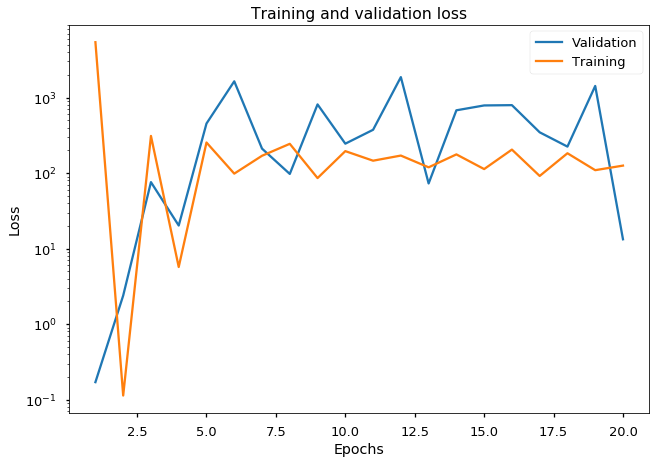

In [54]:
plot_metric(h,'loss')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 128)               256       
_________________________________________________________________
dense_56 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_57 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 33        
Total params: 10,625
Trainable params: 10,625
Non-trainable params: 0
_________________________________________________________________
Train on 900 samples, validate on 100 samples
Epoch 1/20
900/900 [==============================] - 1s 1ms/step - loss: 20220.2209 - mean_absolute_error: 123.4528 - val_loss: 51697.3008 - val_mean_absolute_error: 227.2670
Epoch 2/20
900/900 [======

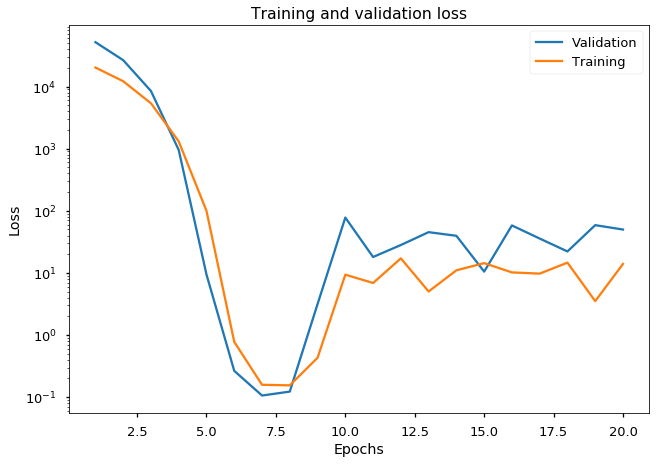

In [64]:
#Create model
model=Sequential()
# Build model
capa1=layers.Dense(units=128,activation='relu',input_shape=(1,))
model.add(capa1)
capa2=layers.Dense(units=64,activation='relu',input_shape=(1,))
model.add(capa2)
model.add(layers.Dense(units=32,activation='relu',input_shape=(1,)))
model.add(layers.Dense(units=1,activation='relu',input_shape=(1,)))

model.summary()
#Compile
model.compile(optimizer=optimizers.RMSprop(), loss=losses.mse, metrics=[metrics.mean_absolute_error])
#Fit
h = model.fit(x_train,y_train,batch_size=100,epochs=20,validation_split=0.1)
#Plot
plot_metric(h,'loss')

Normalizamos los datos

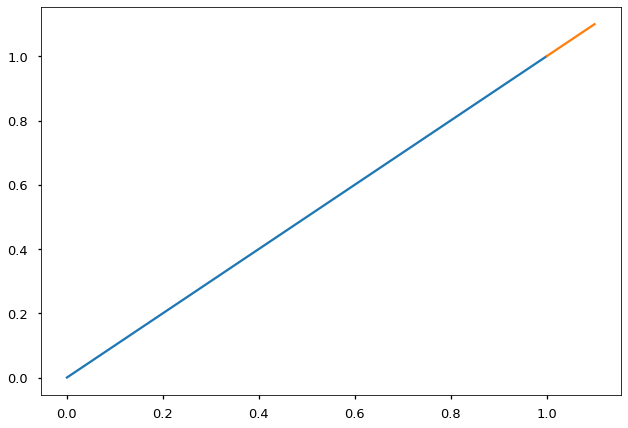

In [68]:
max_x,min_x=x_train.max(),x_train.min()
x_train_norm=(x_train-min_x)/(max_x-min_x)

max_y,min_y=y_train.max(),y_train.min()
y_train_norm=(y_train-min_y)/(max_y-min_y)

x_test_norm=(x_test-min_x)/(max_x-min_x)

y_test_norm=(y_test-min_y)/(max_y-min_y)

plot(x_train_norm,y_train_norm)
plot(x_test_norm,y_test_norm)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 32)                64        
_________________________________________________________________
dense_73 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 17        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________
Train on 900 samples, validate on 100 samples
Epoch 1/30
900/900 [==============================] - 1s 1ms/step - loss: 0.1892 - mean_absolute_error: 0.3665 - val_loss: 0.5034 - val_mean_absolute_error: 0.7091
Epoch 2/30
900/900 [==============================] - 0s 34us/step - loss: 0.1052 - mean_absolute_error: 0.2648 - val_loss: 0.3204 - val_mean_absolute_error: 0.5657
Epoch 3/30

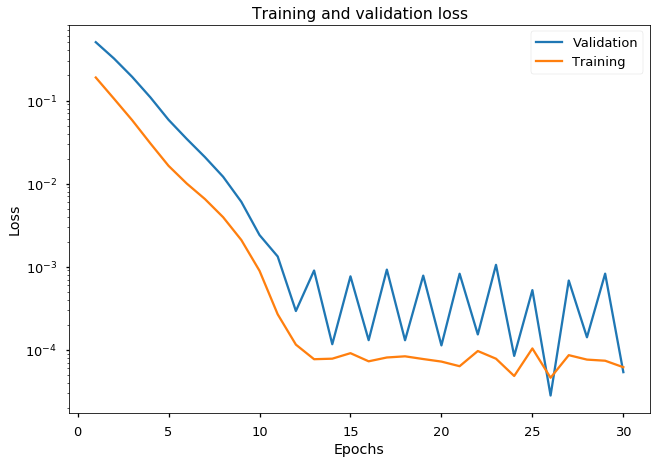

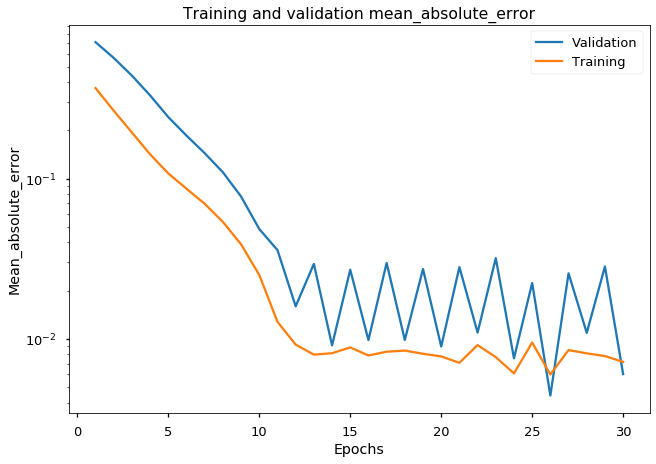

In [75]:
#Create model
model=Sequential()
# Build model
model.add(layers.Dense(units=32,activation='relu',input_shape=(1,)))
model.add(layers.Dense(units=16,activation='relu',input_shape=(1,)))
model.add(layers.Dense(units=1,activation='relu',input_shape=(1,)))

model.summary()
#Compile
m= model.compile(optimizer=optimizers.rmsprop(), loss=losses.mse, metrics=[metrics.mean_absolute_error])
#Fit
h = model.fit(x_train_norm,y_train_norm,batch_size=100,epochs=30,validation_split=0.1)
#Plot
plot_metric(h,'loss')
plot_metric(h,'mean_absolute_error')

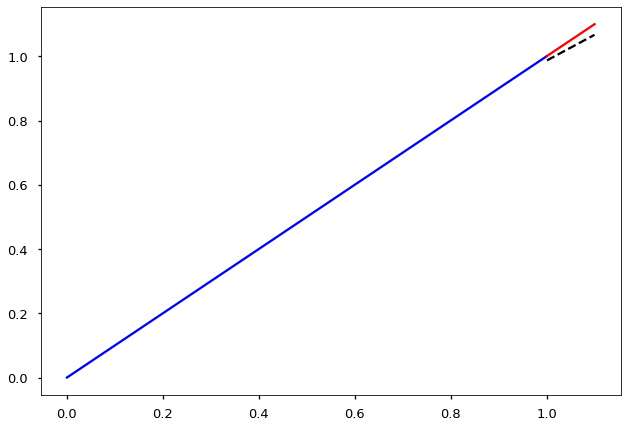

In [77]:
p=model.predict(x_test_norm)
plt.plot(x_train_norm,y_train_norm,'b')
plt.plot(x_test_norm, y_test_norm,'r')
plt.plot(x_test_norm,p,'--k')

Intentamos mejorarlo:

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 64)                128       
_________________________________________________________________
dense_104 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_105 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_106 (Dense)            (None, 1)                 17        
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________
Train on 900 samples, validate on 100 samples
Epoch 1/10
900/900 [==============================] - 2s 2ms/step - loss: 0.0375 - mean_absolute_error: 0.1428 - val_loss: 0.0185 - val_mean_absolute_error: 0.1358
Epoch 2/10
900/900 [===================

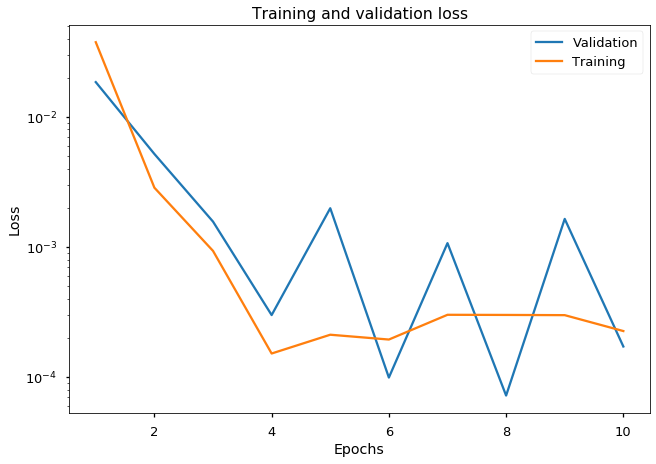

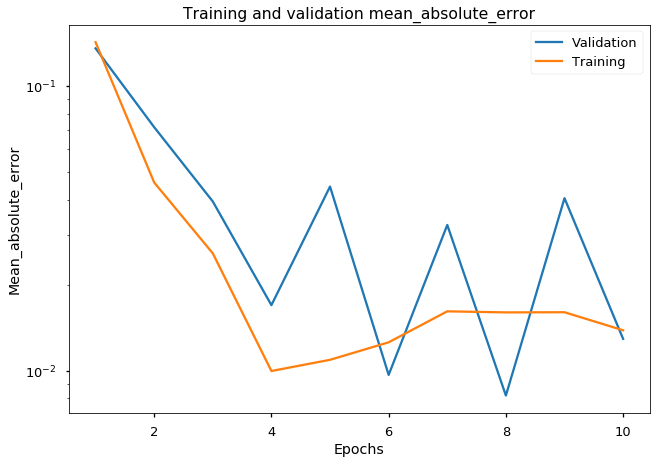

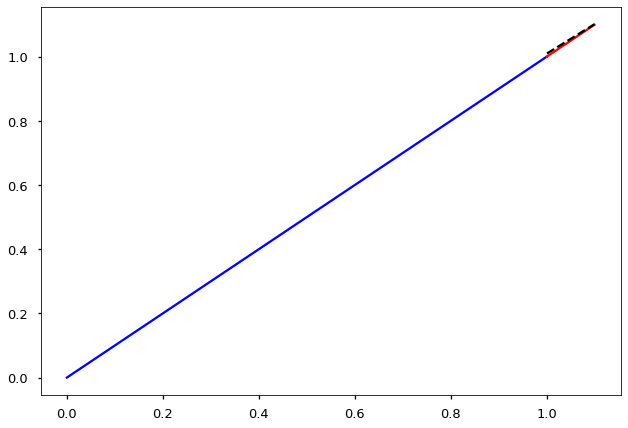

In [86]:
#Create model
model=Sequential()
# Build model
model.add(layers.Dense(units=64,activation='relu',input_shape=(1,)))
model.add(layers.Dense(units=32,activation='relu',input_shape=(1,)))
model.add(layers.Dense(units=16,activation='relu',input_shape=(1,)))
model.add(layers.Dense(units=1,activation='relu',input_shape=(1,)))

model.summary()
#Compile
model.compile(optimizer=optimizers.RMSprop(), loss=losses.mse, metrics=[metrics.mean_absolute_error])
#Fit
h = model.fit(x_train_norm,y_train_norm,batch_size=100,epochs=10,validation_split=0.1)
#Plot
plot_metric(h,'loss')
plot_metric(h,'mean_absolute_error')

p=model.predict(x_test_norm)
plt.plot(x_train_norm,y_train_norm,'b')
plt.plot(x_test_norm, y_test_norm,'r')
plt.plot(x_test_norm,p,'--k')

### Now another more complex function

Let's try to fit a parabollic function

$\displaystyle y = -2x^2 + x + 1$

In [0]:
def f(x):
  return -2*x**2+x+1

In [0]:
x_train = np.linspace(-100, 100, 10000)
y_train = f(x_train)

x_test = np.linspace(100.1, 110, 10000)
y_test = f(x_test)

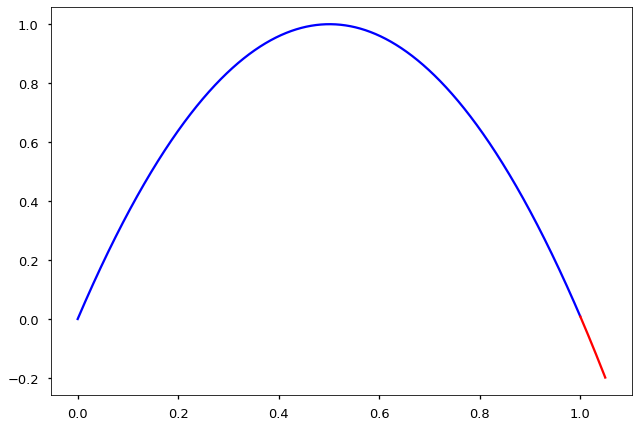

In [108]:
max_x,min_x=x_train.max(),x_train.min()
x_train_norm=(x_train-min_x)/(max_x-min_x)

max_y,min_y=y_train.max(),y_train.min()
y_train_norm=(y_train-min_y)/(max_y-min_y)

x_test_norm=(x_test-min_x)/(max_x-min_x)

y_test_norm=(y_test-min_y)/(max_y-min_y)

plot(x_train_norm,y_train_norm,'b')
plot(x_test_norm,y_test_norm,'r')

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_134 (Dense)            (None, 32)                64        
_________________________________________________________________
dense_135 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_136 (Dense)            (None, 1)                 17        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________
Train on 9000 samples, validate on 1000 samples
Epoch 1/30
9000/9000 [==============================] - 2s 258us/step - loss: 0.1532 - mean_absolute_error: 0.3250 - val_loss: 0.6809 - val_mean_absolute_error: 0.8164
Epoch 2/30
9000/9000 [==============================] - 0s 35us/step - loss: 0.0512 - mean_absolute_error: 0.1943 - val_loss: 0.4927 - val_mean_absolute_error: 0.6932
Ep

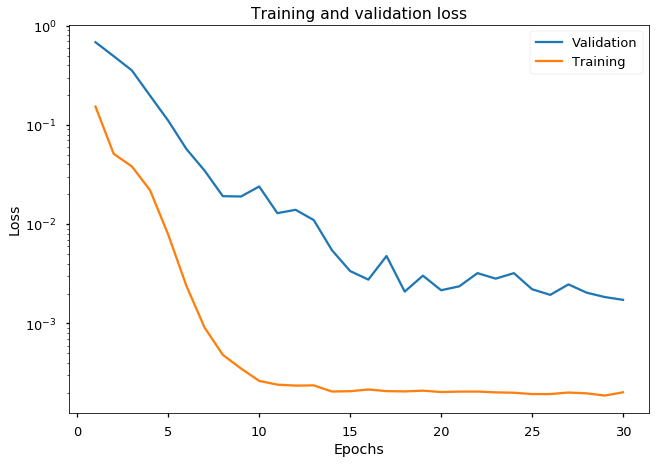

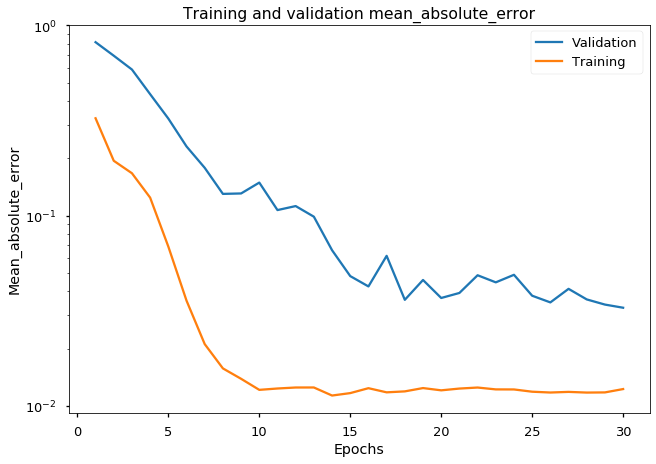

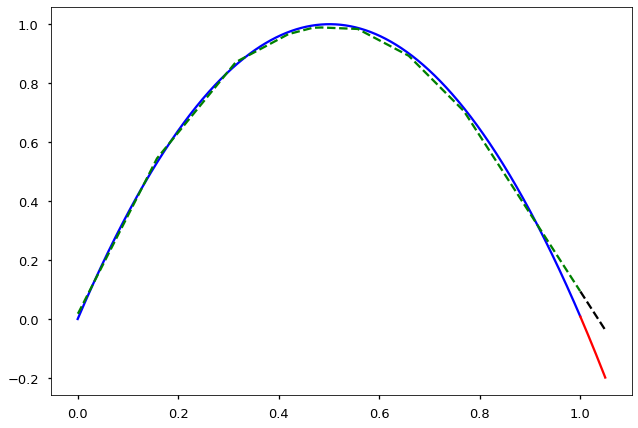

In [103]:
#Create model
model=Sequential()
# Build model
model.add(layers.Dense(units=32,activation='relu',input_shape=(1,)))
model.add(layers.Dense(units=16,activation='relu',input_shape=(1,)))
model.add(layers.Dense(units=1,activation=None,input_shape=(1,)))

model.summary()
#Compile
m= model.compile(optimizer=optimizers.rmsprop(), loss=losses.mse, metrics=[metrics.mean_absolute_error])
#Fit
h = model.fit(x_train_norm,y_train_norm,batch_size=100,epochs=30,validation_split=0.1)
#Plot
plot_metric(h,'loss')
plot_metric(h,'mean_absolute_error')

p=model.predict(x_test_norm)
p_train=model.predict(x_train_norm)

plt.plot(x_train_norm,y_train_norm,'b')
plt.plot(x_test_norm, y_test_norm,'r')
plt.plot(x_train_norm,p_train,'--g')
plt.plot(x_test_norm,p,'--k')

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_209 (Dense)            (None, 24)                48        
_________________________________________________________________
dense_210 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_211 (Dense)            (None, 1)                 13        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
10000/10000 [==============================] - 3s 289us/step - loss: 0.1269 - mean_absolute_error: 0.2967
Epoch 2/30
10000/10000 [==============================] - 0s 32us/step - loss: 0.0778 - mean_absolute_error: 0.2395
Epoch 3/30
10000/10000 [==============================] - 0s 30us/step - loss: 0.0645 - mean_absolute_error: 0.2175
Epoch 4/30
10000/10000 [============

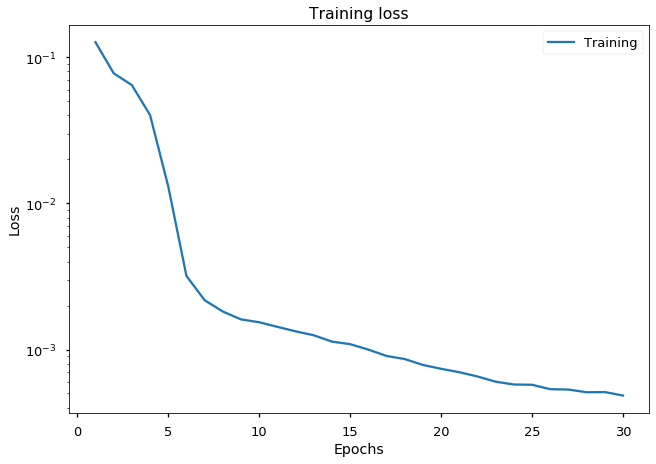

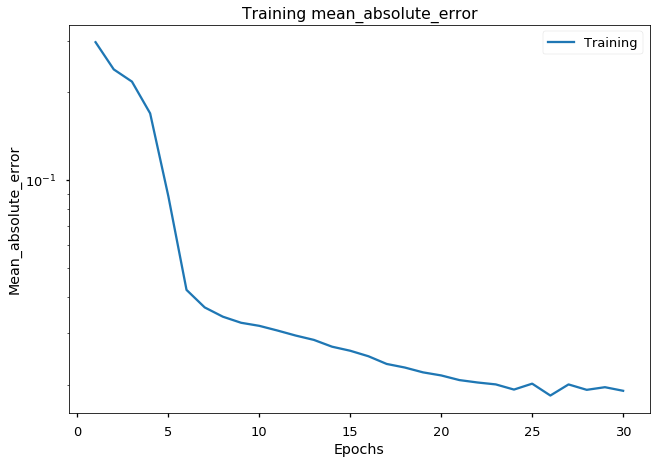

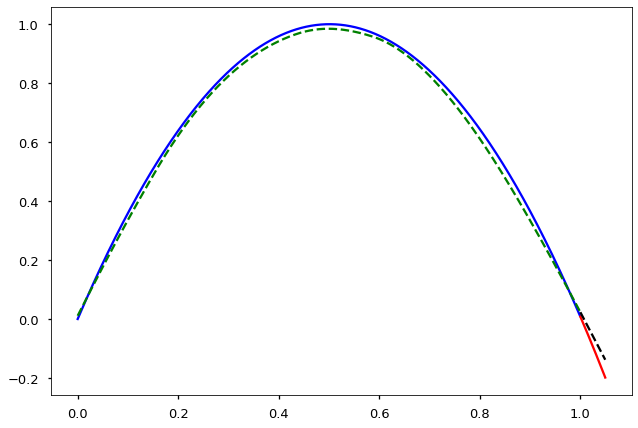

In [122]:
#Create model
model=Sequential()
# Build model
model.add(layers.Dense(units=24,activation='elu',input_shape=(1,)))
model.add(layers.Dense(units=12,activation='elu',input_shape=(1,)))
model.add(layers.Dense(units=1,activation=None,input_shape=(1,)))

model.summary()
#Compile
m= model.compile(optimizer=optimizers.rmsprop(), loss=losses.mse, metrics=[metrics.mean_absolute_error])
#Fit
h = model.fit(x_train_norm,y_train_norm,batch_size=100,epochs=30)
#Plot
plot_metric(h,'loss')
plot_metric(h,'mean_absolute_error')

p=model.predict(x_test_norm)
p_train=model.predict(x_train_norm)

plt.plot(x_train_norm,y_train_norm,'b')
plt.plot(x_test_norm, y_test_norm,'r')
plt.plot(x_train_norm,p_train,'--g')
plt.plot(x_test_norm,p,'--k')

### And now even a more complex one

Let's try to predict now this function:

$\displaystyle y = \cos(x)$

In [0]:
def f(x):
  return np.cos(x)

In [0]:
x_train = np.linspace(-100, 100, 10000)
y_train = f(x_train)

x_test = np.linspace(100.1, 110, 10000)
y_test = f(x_test)

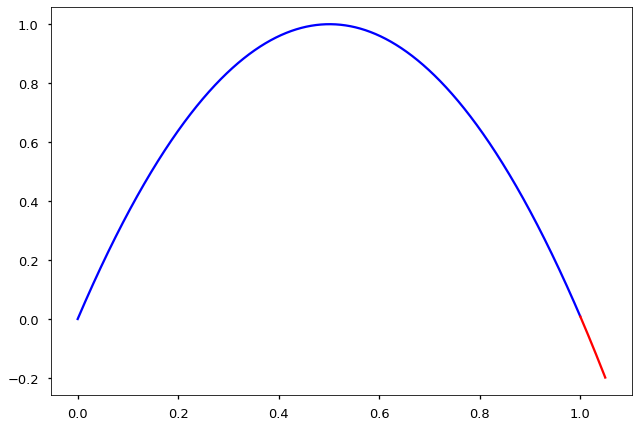

In [0]:
max_x,min_x=x_train.max(),x_train.min()
x_train_norm=(x_train-min_x)/(max_x-min_x)

max_y,min_y=y_train.max(),y_train.min()
y_train_norm=(y_train-min_y)/(max_y-min_y)

x_test_norm=(x_test-min_x)/(max_x-min_x)

y_test_norm=(y_test-min_y)/(max_y-min_y)

plot(x_train_norm,y_train_norm,'b')
plot(x_test_norm,y_test_norm,'r')

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_134 (Dense)            (None, 32)                64        
_________________________________________________________________
dense_135 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_136 (Dense)            (None, 1)                 17        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________
Train on 9000 samples, validate on 1000 samples
Epoch 1/30
9000/9000 [==============================] - 2s 258us/step - loss: 0.1532 - mean_absolute_error: 0.3250 - val_loss: 0.6809 - val_mean_absolute_error: 0.8164
Epoch 2/30
9000/9000 [==============================] - 0s 35us/step - loss: 0.0512 - mean_absolute_error: 0.1943 - val_loss: 0.4927 - val_mean_absolute_error: 0.6932
Ep

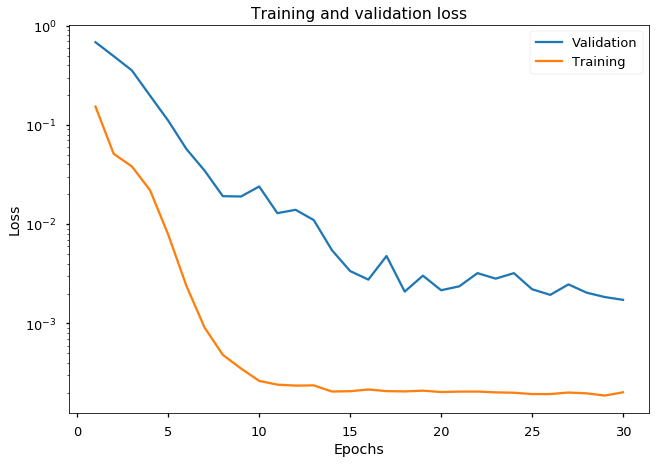

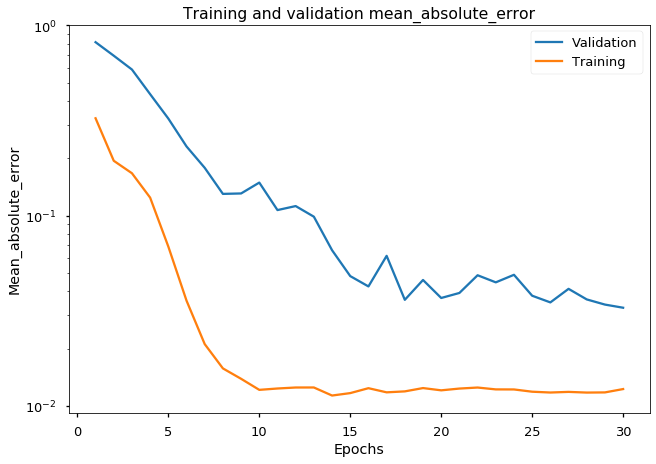

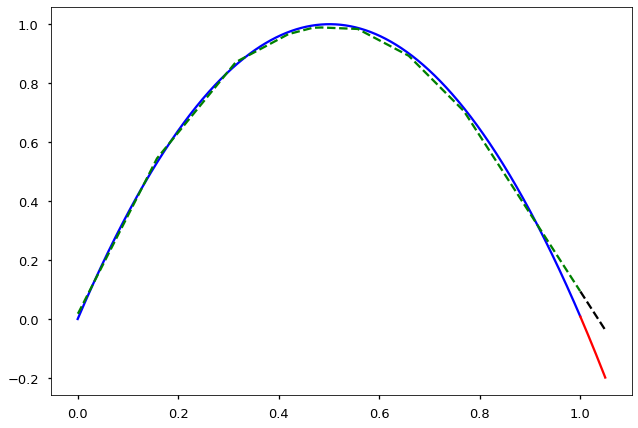

In [0]:
#Create model
model=Sequential()
# Build model
model.add(layers.Dense(units=24,activation='elu',input_shape=(1,)))
model.add(layers.Dense(units=12,activation='elu',input_shape=(1,)))
model.add(layers.Dense(units=1,activation=None,input_shape=(1,)))

model.summary()
#Compile
m= model.compile(optimizer=optimizers.rmsprop(), loss=losses.mse, metrics=[metrics.mean_absolute_error])
#Fit
h = model.fit(x_train_norm,y_train_norm,batch_size=100,epochs=30)
#Plot
plot_metric(h,'loss')
plot_metric(h,'mean_absolute_error')

p=model.predict(x_test_norm)
p_train=model.predict(x_train_norm)

plt.plot(x_train_norm,y_train_norm,'b')
plt.plot(x_test_norm, y_test_norm,'r')
plt.plot(x_train_norm,p_train,'--g')
plt.plot(x_test_norm,p,'--k')